### Covid 19

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import datetime
import bokeh

%matplotlib inline     
#--whenever create a new plot, it is a new plot, change the code to change it

#%matplotlib notebook  
#--create one plot for the whole notebook, any code changes that one plot

In [2]:

mpl.style.use(["seaborn-pastel"])


In [3]:
#--get date

datetime.date.today()    #--today!
yesterday = datetime.date.today() - datetime.timedelta(days=1)  #--yesterday!
day_before = datetime.date.today() - datetime.timedelta(days=2)  #--the day before

#date.today().strftime("%D")    #--'06/15/20'
#date.today().strftime("%B %d, %Y")    #---'June 15, 2020', %B spells out month, Y is 2020, y is 20
#date.today().strftime("%b/%d/%Y")   #--'Jun/15/2020'    / for /, b for abbreviation of month 

date_url = yesterday.strftime("%m-%d-%Y")  #-- "-" for "-"
date_prior_url = day_before.strftime("%m-%d-%Y")  #-- "-" for "-"
date_url

'06-17-2020'

### get us data by states, and state geo data

In [4]:
#--corona case~~~~

url_data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{}.csv"
case_us = pd.read_csv(url_data.format(date_url))
case_us_priorday = pd.read_csv(url_data.format(date_prior_url))

case_us_priorday.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-17 04:33:33,32.3182,-86.9023,26912,785,13508.0,12619.0,1,548.867726,305424.0,2315.0,2.916914,84000001,USA,6229.093946,8.602111
1,Alaska,US,2020-06-17 04:33:33,61.3707,-152.4044,675,12,429.0,234.0,2,92.270469,76215.0,NaN,1.777778,84000002,USA,10418.361140,NaN
2,American Samoa,US,2020-06-17 04:33:33,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,174.0,NaN,NaN,16,ASM,312.719038,NaN
3,Arizona,US,2020-06-17 04:33:33,33.7298,-111.4312,39185,1228,6598.0,31359.0,4,538.350371,354334.0,3808.0,3.133852,84000004,USA,4868.083208,9.718004
4,Arkansas,US,2020-06-17 04:33:33,34.9697,-92.3731,13191,188,8352.0,4651.0,5,437.105922,205566.0,1026.0,1.425214,84000005,USA,6811.774390,7.778030


In [5]:
#--check data 
case_us[["Province_State","Lat","Long_"]].groupby("Province_State").nunique()  #--this gets unique value count!!!

df_state = case_us[["Province_State","Confirmed","Deaths","Recovered","Active"]].set_index("Province_State").fillna(0)
df_change= df_state - case_us_priorday[["Province_State","Confirmed","Deaths","Recovered","Active"]].set_index("Province_State").fillna(0)

df_change = df_change.add_suffix("_change_1d")
#(df_change["Confirmed_change_1d"]/df_state["Confirmed"]).fillna(0) #--devide two columns as series!!!

df_state = df_state.reset_index()
df_change = df_change.reset_index()

print(df_state.head())
print(df_change.head())

   Province_State  Confirmed  Deaths  Recovered   Active
0         Alabama      27312     790    15974.0  10548.0
1          Alaska        695      12      438.0    245.0
2  American Samoa          0       0        0.0      0.0
3         Arizona      40937    1249     6715.0  32973.0
4        Arkansas      13606     197     8996.0   4413.0
   Province_State  Confirmed_change_1d  Deaths_change_1d  Recovered_change_1d  \
0         Alabama                  400                 5               2466.0   
1          Alaska                   20                 0                  9.0   
2  American Samoa                    0                 0                  0.0   
3         Arizona                 1752                21                117.0   
4        Arkansas                  415                 9                644.0   

   Active_change_1d  
0           -2071.0  
1              11.0  
2               0.0  
3            1614.0  
4            -238.0  


In [6]:
#--get top 15 overall, and top 15 growth 

top15_all = df_state.sort_values(by = "Confirmed", ascending = False).head(15)
top15_all = pd.merge(top15_all, df_change, left_on = "Province_State", right_on = "Province_State", how = "left")
#--if use index, do left_index = True
top15_all["Confirmed_pct_change"] = (top15_all["Confirmed_change_1d"]/top15_all["Confirmed"]).fillna(0)
top15_all = top15_all.set_index("Province_State")

top15_change = df_change.sort_values(by = "Confirmed_change_1d", ascending = False).set_index("Province_State").head(15)
top15_change = pd.merge(top15_change, df_state, left_on = "Province_State", right_on = "Province_State", how = "left")
top15_change["Confirmed_pct_change"] = (top15_change["Confirmed_change_1d"]/top15_change["Confirmed"]).fillna(0)
top15_change = top15_change.set_index("Province_State")

top15_all
top15_change

,Confirmed_change_1d,Deaths_change_1d,Recovered_change_1d,Active_change_1d,Confirmed,Deaths,Recovered,Active,Confirmed_pct_change
Province_State,,,,,,,,,
Texas,4130,40,1687.0,2403.0,97699,2089,62368.0,33242.0,0.042273
California,3837,71,0.0,3766.0,162798,5271,0.0,157527.0,0.023569
Florida,2610,25,0.0,2585.0,82719,3018,0.0,79701.0,0.031553
Arizona,1752,21,117.0,1614.0,40937,1249,6715.0,32973.0,0.042797
North Carolina,1027,12,0.0,1015.0,46934,1181,29219.0,16534.0,0.021882
Georgia,952,46,0.0,906.0,60030,2575,0.0,57455.0,0.015859
Louisiana,928,20,0.0,908.0,48634,3062,37017.0,8555.0,0.019081
New York,567,30,147.0,390.0,385142,30939,69085.0,285118.0,0.001472
South Carolina,566,10,0.0,556.0,20556,617,9734.0,10205.0,0.027535


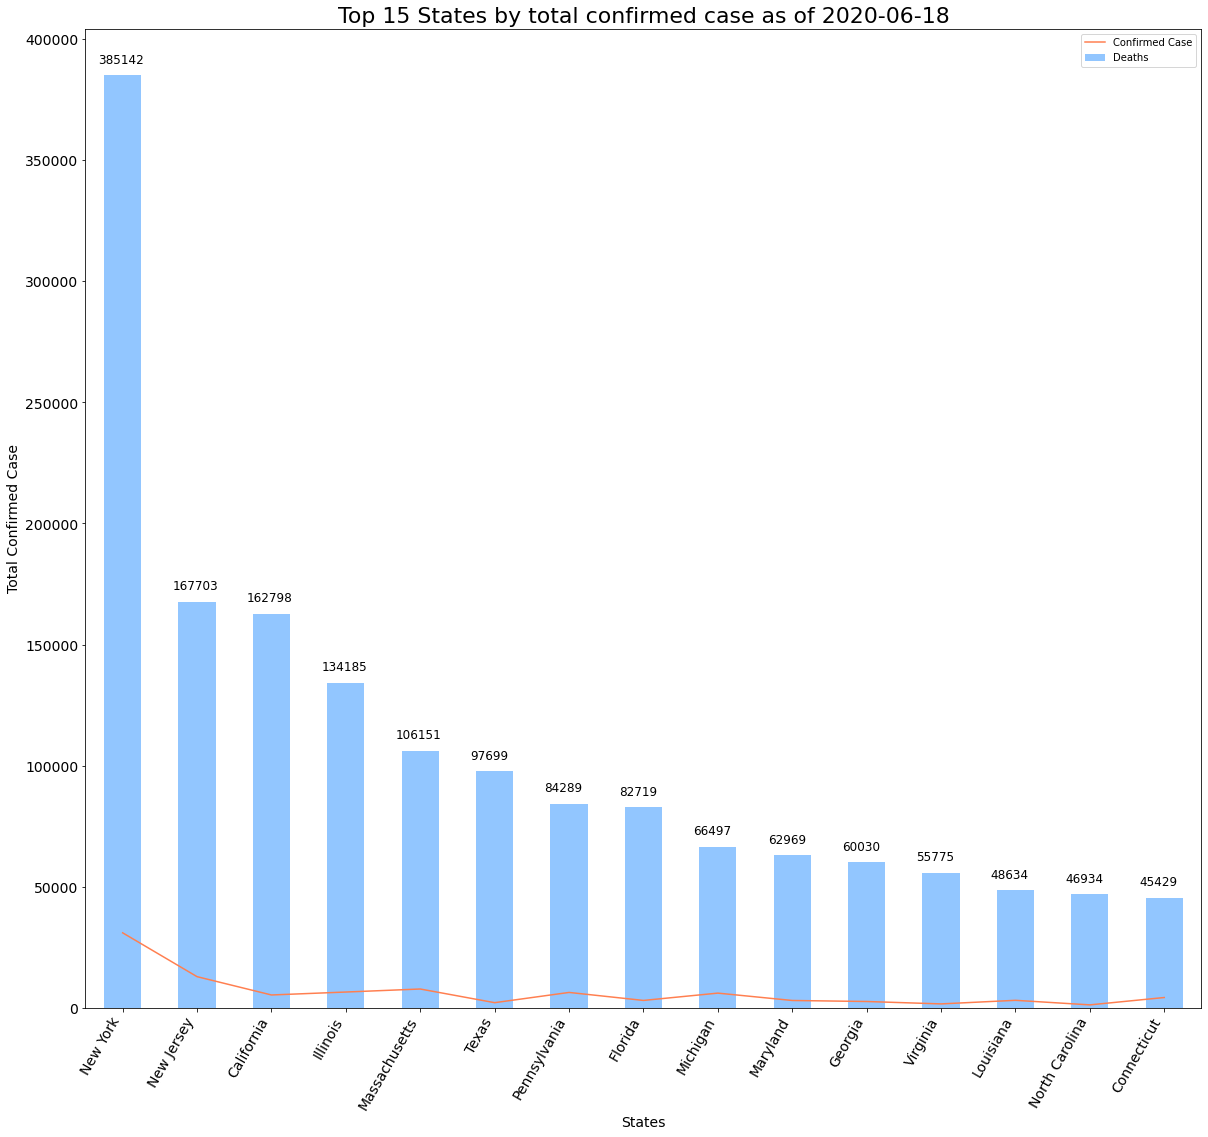

In [54]:
#--top 15 by all confirmed case!

fig, ax = plt.subplots()

ax1 = top15_all[["Confirmed"]].plot(kind = "bar", figsize = (20,20), width = 0.5, fontsize = 14, ax = ax)
#ax2 = ax.twinx()
ax2 = top15_all[["Deaths"]].plot(kind = "line",figsize = (20,20), fontsize = 14, ax = ax1, color = "coral")
ax.set_xlabel("States", fontsize = 14)
ax.legend(["Confirmed Case","Deaths"]) #--set legend, remember now they are using the same x-axis!
#ax2.legend_ = None  #--remove legend 
ax.set_xlabel("States", fontsize = 14)
ax1.set_ylabel("Total Confirmed Case", fontsize = 14)
#ax2.set_ylabel("pct increase as of {}".format(yesterday), fontsize = 14)

fig.autofmt_xdate(rotation=60)   #--when using axes, how to rotate xticks!
    
for p in ax.patches:
    ax1.annotate(p.get_height(),  #--this is the text, get height here is the lengh of the bar!
                 #--here for decimal: "{:.2%}".format(p.get_height())
                 xy = (p.get_x()-0.08, p.get_height()+5000),   #--x and y, y here because the value here is too high so +1000
                 fontsize = 12) 
    
plt.title("Top 15 States by total confirmed case as of {}".format(datetime.date.today()), fontsize = 22)
plt.show()

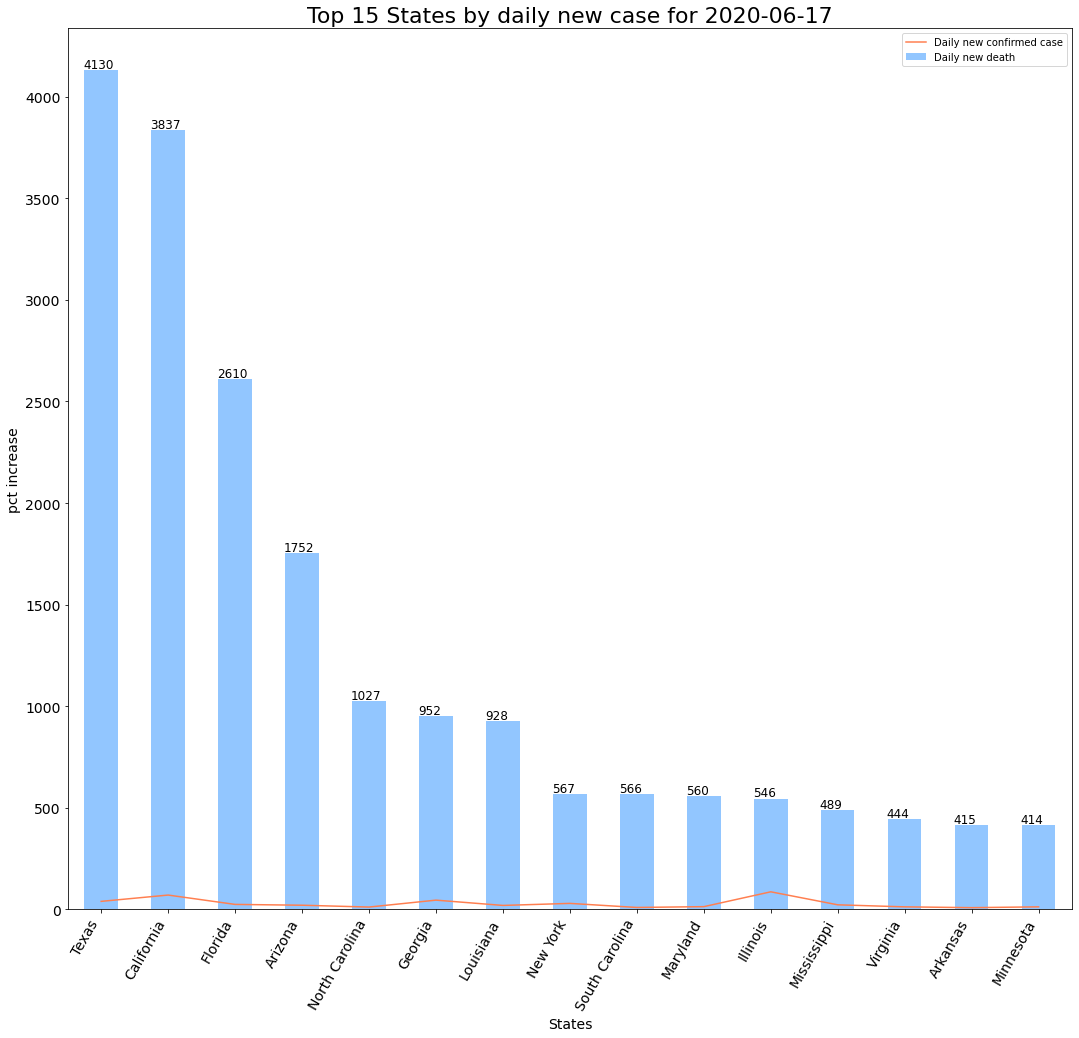

In [53]:
#--top 15 by one day change

fig, ax = plt.subplots()

ax3 = top15_change[["Confirmed_change_1d"]].plot(kind = "bar", figsize = (18,18), width = 0.5, fontsize = 14, ax = ax)
#ax4 = ax.twinx()
#ax4 = top15_change[["Confirmed_pct_change"]].plot(kind = "line",figsize = (18,18), fontsize = 14, ax = ax4, color = "coral")
ax4 = top15_change[["Deaths_change_1d"]].plot(kind = "line",figsize = (18,18), fontsize = 14, ax = ax3, color = "coral")
ax.legend(["Daily new confirmed case","Daily new death"]) #--set legend, remember now they are using the same x-axis!
#ax4.legend_ = None  #--remove legend 
ax.set_xlabel("States", fontsize = 14)
ax3.set_ylabel("Daily New Case", fontsize = 14)
ax4.set_ylabel("pct increase", fontsize = 14)

fig.autofmt_xdate(rotation=60)   #--when using axes, how to rotate xticks!
   
for p in ax.patches:
    ax3.annotate(p.get_height(),  #--this is the text, get height here is the lengh of the bar!
                 #--here for decimal: "{:.2%}".format(p.get_height())
                 xy = (p.get_x()-0.02, p.get_height()+10),   #--x and y, y here because the value here is too high so +1000
                 fontsize = 12)

#--or do this when index is numerical value!!!!!!!
#for index, value in enumerate(top15_change["Confirmed_change_1d"]):    #---looks like it needs to be serie!
#    label = format(int(value),",")
#    plt.annotate(label, xy= (index - 0.01, value + 5), color="black", fontsize = 12)  

plt.title("Top 15 States by daily new case for {}".format(yesterday), fontsize = 22)
plt.show()

In [9]:
#--choropleth graph for total confirmed case

url_state = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
pd.read_json(url_state)["features"][0]["properties"]["name"]


us_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=url_state,
    name='choropleth',
    data=df_state,
    columns=["Province_State", "Confirmed"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Confirmed Case"
).add_to(us_map)

folium.LayerControl().add_to(us_map)

us_map

In [10]:
#--choropleth graph for daily new case increase

us_map_change = folium.Map(location=[48, -102], zoom_start=4)


folium.Choropleth(
    geo_data=url_state,
    name='choropleth',
    data=df_change,
    columns=["Province_State", "Confirmed_change_1d"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Newly Confirmed Case for {}".format(datetime.date.today())
).add_to(us_map_change)

folium.LayerControl().add_to(us_map_change)

us_map_change


### for Chicago


In [11]:

url_il = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv"
case_il = pd.read_csv(url_il.format(date_url))
#case_us_priorday = pd.read_csv(path.format(date_prior_url))

#case_us_priorday.head()

case_il = case_il[case_il["Province_State"]=="Illinois"]
case_il

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
10,17001.0,Adams,Illinois,US,2020-06-18 04:33:18,39.988156,-91.187868,45,1,0,44,"Adams, Illinois, US",68.770536,2.222222
31,17003.0,Alexander,Illinois,US,2020-06-18 04:33:18,37.180493,-89.329108,17,0,0,17,"Alexander, Illinois, US",295.087658,0.000000
220,17005.0,Bond,Illinois,US,2020-06-18 04:33:18,38.888296,-89.435349,12,1,0,11,"Bond, Illinois, US",73.054913,8.333333
224,17007.0,Boone,Illinois,US,2020-06-18 04:33:18,42.323593,-88.823458,542,19,0,523,"Boone, Illinois, US",1012.251606,3.505535
272,17009.0,Brown,Illinois,US,2020-06-18 04:33:18,39.962091,-90.750680,10,0,0,10,"Brown, Illinois, US",152.021891,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,17195.0,Whiteside,Illinois,US,2020-06-18 04:33:18,41.755097,-89.915561,163,15,0,148,"Whiteside, Illinois, US",295.423652,9.202454
2986,17197.0,Will,Illinois,US,2020-06-18 04:33:18,41.446193,-87.978627,6222,308,0,5914,"Will, Illinois, US",900.769172,4.950177
2992,17199.0,Williamson,Illinois,US,2020-06-18 04:33:18,37.730335,-88.929940,89,3,0,86,"Williamson, Illinois, US",133.639653,3.370787
3005,17201.0,Winnebago,Illinois,US,2020-06-18 04:33:18,42.336419,-89.160853,2776,81,0,2695,"Winnebago, Illinois, US",982.404485,2.917867


In [12]:
#--load json file
county_boundary = pd.read_json(r"C:\Users\Yiwen\Python\Data\us-county-boundaries_IL.json")
county_boundary["fields"][0]["name"] 
#--put r infront of local link! 
#--or pd.read_json("C:\\Users\\Yiwen\\Python\\Data\\us-county-boundaries.json")
#--or pd.read_json("C:/Users/Yiwen/Python/Data/us-county-boundaries.json")



'Coles'

In [13]:
#json_normalize(county_boundary["fields"]["geo_shape"]) #[0]["coordinates"]#.dropna()

#county_boundary["fields"][0]["geo_shape"]

#json_normalize(json_state["features"])

#county_boundary["fields"][0]

name = []
geo = []

for i in np.arange(len(county_boundary)):
    name.append(county_boundary["fields"][i]["name"])
    geo.append(county_boundary["fields"][i]["geo_shape"])
    df_name = pd.DataFrame(name, columns = ["name"])
    df_geo = pd.concat([df_name, pd.DataFrame(geo)], axis = 1)

df_geo
    
    

,name,type,coordinates
0,Coles,Polygon,"[[[-88.358209, 39.651674], [-88.358207, 39.651..."
1,St. Clair,Polygon,"[[[-90.177868, 38.642649], [-90.178227, 38.644..."
2,Fayette,Polygon,"[[[-89.250603, 39.152012], [-89.250616, 39.152..."
3,Crawford,Polygon,"[[[-87.946706, 39.068348], [-87.94677, 39.0838..."
4,Hamilton,Polygon,"[[[-88.704606, 38.125195], [-88.7046, 38.12539..."
...,...,...,...
97,De Witt,Polygon,"[[[-89.147794, 40.223993], [-89.147799, 40.224..."
98,Brown,Polygon,"[[[-90.914687, 40.018039], [-90.914688, 40.018..."
99,Effingham,Polygon,"[[[-88.805688, 39.086336], [-88.805683, 39.089..."
100,Moultrie,Polygon,"[[[-88.81123, 39.681922], [-88.811226, 39.6820..."


In [14]:
#--IL: 40.6331° N, 89.3985° W
il_map = folium.Map(location = [40.63, -89.4], zoom_start = 8)
#il_map

folium.Choropleth(geo_data = "https://github.com/python-visualization/folium/blob/master/examples/data/us_counties_20m_topo.json",
                  name = "coropleth", 
                data = case_il, 
                columns = ["Admin2","Confirmed"], 
                key_on = "properties.GEO_ID",
                fill_color = "BuPu", 
                fill_opacity = 0.7, 
                line_opacity = 0.2).add_to(il_map)

folium.LayerCountrol().add_to(il_map)

il_map

JSONDecodeError: Expecting value: line 6 column 1 (char 5)

In [ ]:
#--choropleth graph for total confirmed case

url_state = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"
json_state = pd.read_json(url_state)
json_state["features"][0]["properties"]["name"]


us_map = folium.Map(location=[48, -102], zoom_start=4)

folium.Choropleth(
    geo_data=url_state,
    name='choropleth',
    data=df_state,
    columns=["Province_State", "Confirmed"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total Confirmed Case"
).add_to(us_map)

folium.LayerControl().add_to(us_map)

us_map

In [ ]:
case_il